In [29]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

from plot_conv_seperate import plot_map

In [30]:
def plot_legend(styles, result_dir=None):
    # Plot the legend
    i = 0
    for style in styles:
        fig, ax = plt.subplots()
        # Create custom lines that will be used as legend entries
        custom_lines = [Line2D([0], [0], **style_element) for keys, style_element in style.items()]
       
        ax.axis('off')
        
        #ax.legend(custom_lines, style.keys(), loc='center')
        # Create the legend from the line objects
        legend = plt.legend(custom_lines, style.keys(), loc='center')

        plt.tight_layout()
        
        # Set the figure size to fit the legend, adjust as needed
        fig.set_size_inches(1.5,1.5)

        plt.savefig(result_dir+"/legend_style_{}.svg".format(i), format="svg", bbox_inches='tight', transparent=True, pad_inches=0, bbox_extra_artists=[legend])
        plt.savefig(result_dir+"/legend_style_{}.png".format(i), dpi=200, bbox_inches='tight', transparent=True, pad_inches=0, bbox_extra_artists=[legend])
        i += 1 # different style part
    #ax.set_title('Actions [v, $\omega$] \nof both agents')

In [31]:
def plot_q_values(ax1, data_frame, styles):
    ax1.set_facecolor('white')

    # Group the DataFrame by 'agent' and 'action'
    grouped = data_frame.groupby(['agent', 'action'])

    # Plot payoff_mean data
    for (agent, action), group in grouped:
        ax1.plot(group['num_iter'], group['payoff_mean'], label=f'Agent {agent}, Action {action}', **styles[f'{agent}: {action}'])

    # Change labels and scales
    ax1.set_xticks(np.arange(100, 5000, step=500))

    # Adding labels and title
    ax1.set_xlabel(r'$n_{iter}$')
    ax1.set_ylabel('$\overline{Q}$($n_{iter}$)')

    # Plot the runtime data
    ax11 = ax1.twinx()
    for (agent, action), group in grouped:
        ax11.plot(group['num_iter'], group['runtime'], label='runtime', **styles['runtime'])
        ax11.set_ylabel('Runtime (in sec)')
        break

In [43]:
def plot_num_values(ax1, data_frame, styles):
    ax1.set_facecolor('white')

    # Group the DataFrame by 'agent' and 'action'
    grouped = data_frame.groupby(['agent', 'action'])

    # Plot payoff_mean data
    for (agent, action), group in grouped:
        ax1.plot(group['num_iter'], group['num_count_mean']/group['num_iter'], label=f'Agent {agent}, Action {action}', **styles[f'{agent}: {action}'])

    # Change labels and scales
    ax1.set_xticks(np.arange(100, 5000, step=500))

    # Adding labels and title
    ax1.set_xlabel(r'$n_{iter}$')
    ax1.set_ylabel('$\overline{n}$$_{count}$/$n_{iter}$')

    # Plot the runtime data
    ax11 = ax1.twinx()
    for (agent, action), group in grouped:
        ax11.plot(group['num_iter'], group['runtime'], label='runtime', **styles['runtime'])
        ax11.set_ylabel('Runtime (in sec)')
        break

In [44]:
def plot_variance(ax, data_frame, styles):
    ax.set_facecolor('white')

    # Group the DataFrame by 'agent' and 'action'
    grouped = data_frame.groupby(['agent', 'action'])

    # Plot variance data
    for (agent, action), group in grouped:
        ax.plot(group['num_iter'], group['payoff_var'], label=f'Agent {agent}, Action {action}', **styles[f'{agent}: {action}'])

    # Change labels and scales
    ax.set_yscale('log')
    ax.set_xticks(np.arange(100, 5000, step=500))

    # Adding labels
    ax.set_xlabel(r'$n_{iter}$')
    ax.set_ylabel('Var(Q)')

In [45]:
### Intersection Informed DUCT

# Configuration
main_exp = "01_intersection"
exp_name = "duct"
data_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(data_dir, os.pardir))
main_dir = os.path.abspath(os.path.join(parent_dir, os.pardir))

input_dir_raw = os.path.join(main_dir, "data_raw", main_exp, exp_name)
input_dir_processed = os.path.join(data_dir, exp_name)

result_dir = os.path.join(main_dir, "results/", main_exp)

if not os.path.exists(result_dir):
    os.makedirs(result_dir)
if not os.path.exists(os.path.join(result_dir, exp_name)):
    os.makedirs(os.path.join(result_dir, exp_name))

print(input_dir_raw)
print(input_dir_processed)

max_game_length = 2 # plot game length from 1 to n

goal_state = [14,3] #[x,y]

#num_actions_0 = len(df['action'].unique())
#num_actions_1 = len(df['action'].unique())

num_actions_0 = 2
num_actions_1 = 2

orange_colors = plt.cm.Oranges(np.linspace(0.2, 0.8, num_actions_0))
blue_colors = plt.cm.Blues(np.linspace(0.2, 0.8, num_actions_1))
#markers = ['o', 'v', '^', '*', '+', 'x', 'D', 'd', '|', '_']

styles_0 = {
    '0: [0.0, 0.0]': {'color': orange_colors[0], 'marker': 'o'},
    '0: [1.0, 0.0]': {'color': orange_colors[1], 'marker': '^'},
}
styles_1 = {
    '1: [0.0, 0.0]': {'color': blue_colors[0], 'marker': 'o'},
    '1: [1.0, 0.0]': {'color': blue_colors[1], 'marker': '^'},
}
styles_runtime = {
    'runtime': {'color': 'black', 'linestyle': '--'},
}

styles = {**styles_0, **styles_1, **styles_runtime}

/home/enjay/0_thesis/motion-planning-using-sm-mcts/data_raw/01_intersection/duct
/home/enjay/0_thesis/motion-planning-using-sm-mcts/data_processed/01_intersection/duct


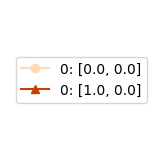

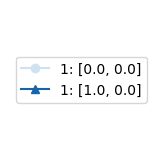

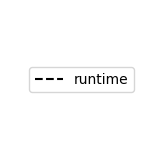

In [46]:
#plot legend seperately
plot_legend([styles_0, styles_1, styles_runtime], result_dir = os.path.join(result_dir,exp_name));

In [47]:
df = pd.read_csv(os.path.join(input_dir_processed, "statistic_data.csv"))

for weight_final in df['weight_final'].unique():   
    game_length=2
    filtered_df = df[(df['game_length'] == game_length) & (df['weight_final'] == weight_final)]
    
    plot_functions = [plot_map, plot_q_values, plot_variance, plot_num_values]
    plot_args = [(input_dir_raw, game_length), (filtered_df, styles), (filtered_df, styles), (filtered_df, styles)]
    plot_names = ['Reachable states within the environment', 'Q-values averaged over 10 runs', 'Variance of Q-values', 'Number of taken action in MCTS']
    fig_sizes = [(10, 5), (6, 5), (6, 5), (6, 5)]


    for plot_func, plot_arg, plot_name, fig_size in zip(plot_functions, plot_args, plot_names, fig_sizes):
        fig, ax = plt.subplots(figsize=fig_size)
        plot_func(ax, *plot_arg)
        #title_text = "Convergence of MCTS in overtaking scenario for a game lengths of  {} - {}".format(game_length, plot_name)
        #fig.suptitle(title_text, fontsize=12, fontweight='bold')

        # Save the plot
        plt.tight_layout()
        #plt.show()
        try:
            print(result_dir+"/"+exp_name+"/{}-{}.svg".format(game_length, plot_name))
            plt.savefig(result_dir+"/"+exp_name+"/wf_{}-{}.svg".format(weight_final, plot_name), format="svg", bbox_inches='tight')
            plt.savefig(result_dir+"/"+exp_name+"/wf_{}-{}.png".format(weight_final, plot_name), dpi=200)
            #tikzplotlib.save(result_dir+exp_name+"/{}_{}.tex".format(game_length, plot_name),standalone=True)
            print("Saved plot for game length: ", game_length)
        
        except:
            continue
        plt.close()
    


/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/duct/2-Reachable states within the environment.svg
Saved plot for game length:  2
/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/duct/2-Q-values averaged over 10 runs.svg
Saved plot for game length:  2
/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/duct/2-Variance of Q-values.svg
Saved plot for game length:  2
/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/duct/2-Number of taken action in MCTS.svg
Saved plot for game length:  2
/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/duct/2-Reachable states within the environment.svg
Saved plot for game length:  2
/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/duct/2-Q-values averaged over 10 runs.svg
Saved plot for game length:  2
/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/duct/2-Variance of Q-values.s

In [51]:
### Intersection Informed EXP3

# Configuration
main_exp = "01_intersection"
exp_name = "exp3"
data_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(data_dir, os.pardir))
main_dir = os.path.abspath(os.path.join(parent_dir, os.pardir))

input_dir_raw = os.path.join(main_dir, "data_raw", main_exp, exp_name)
input_dir_processed = os.path.join(data_dir, exp_name)

result_dir = os.path.join(main_dir, "results/", main_exp)

if not os.path.exists(result_dir):
    os.makedirs(result_dir)
if not os.path.exists(os.path.join(result_dir, exp_name)):
    os.makedirs(os.path.join(result_dir, exp_name))

print(input_dir_raw)
print(input_dir_processed)

max_game_length = 2 # plot game length from 1 to n

goal_state = [14,3] #[x,y]

#num_actions_0 = len(df['action'].unique())
#num_actions_1 = len(df['action'].unique())

num_actions_0 = 2
num_actions_1 = 2

orange_colors = plt.cm.Oranges(np.linspace(0.2, 0.8, num_actions_0))
blue_colors = plt.cm.Blues(np.linspace(0.2, 0.8, num_actions_1))
#markers = ['o', 'v', '^', '*', '+', 'x', 'D', 'd', '|', '_']

styles_0 = {
    '0: [0.0, 0.0]': {'color': orange_colors[0], 'marker': 'o'},
    '0: [1.0, 0.0]': {'color': orange_colors[1], 'marker': '^'},
}
styles_1 = {
    '1: [0.0, 0.0]': {'color': blue_colors[0], 'marker': 'o'},
    '1: [1.0, 0.0]': {'color': blue_colors[1], 'marker': '^'},
}
styles_runtime = {
    'runtime': {'color': 'black', 'linestyle': '--'},
}

styles = {**styles_0, **styles_1, **styles_runtime}

/home/enjay/0_thesis/motion-planning-using-sm-mcts/data_raw/01_intersection/exp3
/home/enjay/0_thesis/motion-planning-using-sm-mcts/data_processed/01_intersection/exp3


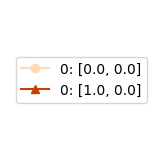

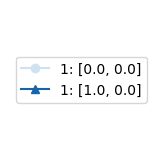

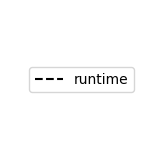

In [52]:
#plot legend seperately
plot_legend([styles_0, styles_1, styles_runtime], result_dir = os.path.join(result_dir,exp_name));

In [53]:
df = pd.read_csv(os.path.join(input_dir_processed, "statistic_data.csv"))

for weight_final in df['weight_final'].unique():
    game_length=2
    for gamma_exp3 in df['gamma_exp3'].unique():
        filtered_df = df[(df['game_length'] == game_length) & (df['gamma_exp3'] == gamma_exp3) & (df['weight_final'] == weight_final)]
        
        plot_functions = [plot_map, plot_q_values, plot_variance, plot_num_values]
        plot_args = [(input_dir_raw, game_length), (filtered_df, styles), (filtered_df, styles), (filtered_df, styles)]
        plot_names = ['Reachable states within the environment', 'Q-values averaged over 10 runs', 'Variance of Q-values', 'Number of taken action in MCTS']
        fig_sizes = [(10, 5), (6, 5), (6, 5), (6, 5)]


        for plot_func, plot_arg, plot_name, fig_size in zip(plot_functions, plot_args, plot_names, fig_sizes):
            fig, ax = plt.subplots(figsize=fig_size)
            plot_func(ax, *plot_arg)
            #title_text = "Convergence of MCTS in overtaking scenario for a game lengths of  {} - {}".format(game_length, plot_name)
            #fig.suptitle(title_text, fontsize=12, fontweight='bold')

            # Save the plot
            plt.tight_layout()
            #plt.show()
            try:
                print(result_dir+"/"+exp_name+"/{}-{}.svg".format(game_length, plot_name))
                plt.savefig(result_dir+"/"+exp_name+"/wf_{}-gamma_{}-{}.svg".format(weight_final, gamma_exp3, plot_name), format="svg", bbox_inches='tight')
                plt.savefig(result_dir+"/"+exp_name+"/wf_{}-gamma_{}-{}.png".format(weight_final, gamma_exp3, plot_name), dpi=200)
                #tikzplotlib.save(result_dir+exp_name+"/{}_{}.tex".format(game_length, plot_name),standalone=True)
                print("Saved plot for game length: ", game_length)
                plt.close()
            except:
                continue
           
    


/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/exp3/2-Reachable states within the environment.svg
Saved plot for game length:  2
/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/exp3/2-Q-values averaged over 10 runs.svg
Saved plot for game length:  2
/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/exp3/2-Variance of Q-values.svg
Saved plot for game length:  2
/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/exp3/2-Number of taken action in MCTS.svg
Saved plot for game length:  2
/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/exp3/2-Reachable states within the environment.svg
Saved plot for game length:  2
/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/exp3/2-Q-values averaged over 10 runs.svg
Saved plot for game length:  2
/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/01_intersection/exp3/2-Variance of Q-values.s

In [ ]:
### Plot DUCT and EXP Together

# Configuration
main_exp = "01_intersection"

exp_name_duct = "duct"
exp_name_exp3 = "exp3"

data_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(data_dir, os.pardir))
main_dir = os.path.abspath(os.path.join(parent_dir, os.pardir))

input_dir_raw_duct = os.path.join(main_dir, "data_raw", main_exp, exp_name_duct)
input_dir_raw_exp3 = os.path.join(main_dir, "data_raw", main_exp, exp_name_exp3)

input_dir_processed_duct = os.path.join(data_dir, exp_name_duct)
input_dir_processed_exp3 = os.path.join(data_dir, exp_name_exp3)

result_dir = os.path.join(main_dir, "results/", main_exp)

if not os.path.exists(result_dir):
    os.makedirs(result_dir)
if not os.path.exists(os.path.join(result_dir, exp_name)):
    os.makedirs(os.path.join(result_dir, exp_name))

print(input_dir_raw)
print(input_dir_processed)

max_game_length = 2 # plot game length from 1 to n

goal_state = [14,3] #[x,y]

#num_actions_0 = len(df['action'].unique())
#num_actions_1 = len(df['action'].unique())

num_actions_0 = 2
num_actions_1 = 2

orange_colors = plt.cm.Oranges(np.linspace(0.2, 0.8, num_actions_0))
blue_colors = plt.cm.Blues(np.linspace(0.2, 0.8, num_actions_1))
#markers = ['o', 'v', '^', '*', '+', 'x', 'D', 'd', '|', '_']

styles_0 = {
    '0: [0.0, 0.0]': {'color': orange_colors[0], 'marker': 'o'},
    '0: [1.0, 0.0]': {'color': orange_colors[1], 'marker': '^'},
}
styles_1 = {
    '1: [0.0, 0.0]': {'color': blue_colors[0], 'marker': 'o'},
    '1: [1.0, 0.0]': {'color': blue_colors[1], 'marker': '^'},
}
styles_runtime = {
    'runtime': {'color': 'black', 'linestyle': '--'},
}

styles = {**styles_0, **styles_1, **styles_runtime}